<a href="https://colab.research.google.com/github/TyroneNorth/Colaboratory-Hazardous-Asteroids/blob/master/Hazardous_Asteroids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset for finding potentially hazardous asteroids. Data retrieved from https://www.kaggle.com/shrutimehta/nasa-asteroids-classification

###Import Data and libraries

In [0]:
pip install pycaret

In [0]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.utils import enable_colab 
enable_colab()

hazas = pd.read_csv('/content/drive/My Drive/Documents/Datasets/nasa asteroid classification/nasa_clean.csv')
hazas.head()

Colab mode activated.


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,1/1/1995,7.889470e+11,6.115834,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1/1/1995,7.889470e+11,18.113985,65210.34609,40519.17311,0.383014,148.992630,57298148.0,35603420.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1/8/1995,7.895520e+11,7.590711,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1/15/1995,7.901570e+11,11.173875,40225.94819,24994.83986,0.285322,110.990387,42683616.0,26522368.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,1/15/1995,7.901570e+11,9.840831,35426.99179,22012.95498,0.407832,158.646713,61010824.0,37910368.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,True


#Overview of Dataset

In [0]:
hazas.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889470e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015570e+12,8.432865,30358.313370,18863.475325,0.133420,51.900211,1.995928e+07,1.240212e+07,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203060e+12,12.917889,46504.401180,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355560e+12,18.077649,65079.535410,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552410,34836.938250,9.680682,21.646663,51114.018740,114294.420500,1.473320e+12,44.633747,160681.487900,99841.227830,0.499884,194.454910,7.478160e+07,4.646713e+07,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


#Preprocessing

###Data not completely cleaned, dropping Name and Neo ref. ID column and several other featues

In [0]:

hazas.drop(labels = [
  'Neo Reference ID',
  'Name',
  'Close Approach Date',
  'Est Dia in M(min)',
  'Est Dia in M(max)',
  'Est Dia in Miles(min)',
  'Est Dia in Miles(max)',
  'Est Dia in Feet(min)',
  'Est Dia in Feet(max)',
  'Miss Dist.(miles)',
  'Miss Dist.(lunar)',
  'Miss Dist.(Astronomical)'
], axis = 1, inplace = True)


hazas.head()


,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,7.889470e+11,6.115834,22017.00380,13680.50994,62753692.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,True
1,21.3,0.146068,0.326618,7.889470e+11,18.113985,65210.34609,40519.17311,57298148.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,False
2,20.3,0.231502,0.517654,7.895520e+11,7.590711,27326.56018,16979.66180,7622911.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,True
3,27.4,0.008801,0.019681,7.901570e+11,11.173875,40225.94819,24994.83986,42683616.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,False
4,21.6,0.127220,0.284472,7.901570e+11,9.840831,35426.99179,22012.95498,61010824.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,True


#Visualization and Correlation

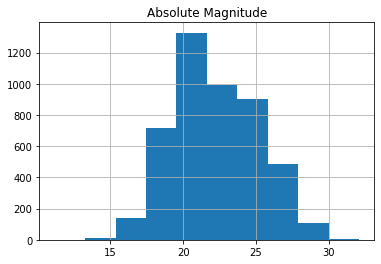

In [0]:
import matplotlib.pyplot as plt
hazas.hist(column='Absolute Magnitude')
plt.show()

In [0]:
corr_matrix = hazas.corr().round(2)
print(corr_matrix)

                              Absolute Magnitude  ...  Hazardous
Absolute Magnitude                          1.00  ...      -0.33
Est Dia in KM(min)                         -0.61  ...       0.13
Est Dia in KM(max)                         -0.61  ...       0.13
Epoch Date Close Approach                   0.17  ...      -0.08
Relative Velocity km per sec               -0.38  ...       0.19
Relative Velocity km per hr                -0.38  ...       0.19
Miles per hour                             -0.38  ...       0.19
Miss Dist.(kilometers)                     -0.34  ...       0.03
Orbit Uncertainity                          0.68  ...      -0.33
Minimum Orbit Intersection                 -0.49  ...      -0.29
Jupiter Tisserand Invariant                 0.24  ...      -0.00
Epoch Osculation                           -0.12  ...       0.04
Eccentricity                               -0.36  ...       0.18
Semi Major Axis                            -0.21  ...      -0.01
Inclination              

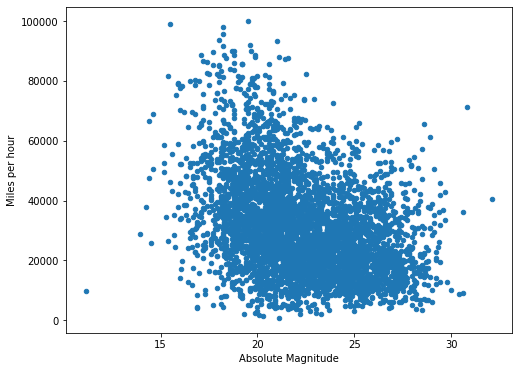

In [0]:
hazas.plot(kind = 'scatter', 
           x = 'Absolute Magnitude',
           y = 'Miles per hour',
           figsize = (8,6))
plt.show()

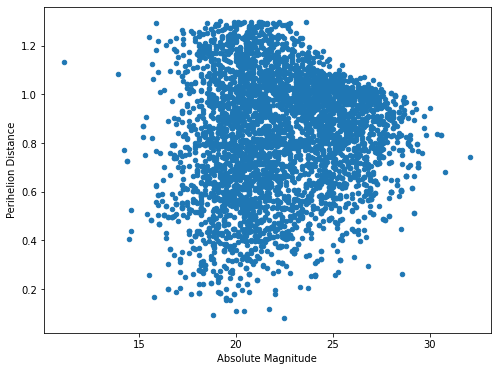

In [0]:
hazas.plot(kind = 'scatter', 
           x = 'Absolute Magnitude',
           y = 'Perihelion Distance',
           figsize = (8,6))
plt.show()

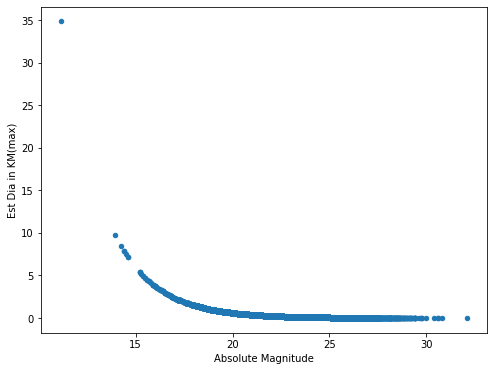

In [0]:
hazas.plot(kind = 'scatter', 
           x = 'Absolute Magnitude',
           y = 'Est Dia in KM(max)',
           figsize = (8,6))
plt.show()

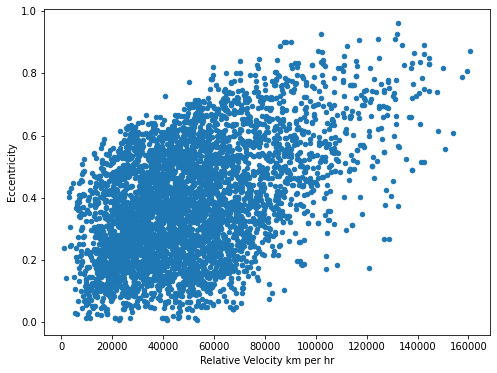

In [0]:
hazas.plot(kind = 'scatter', 
           x = 'Relative Velocity km per hr',
           y = 'Eccentricity',
           figsize = (8,6))
plt.show()

#Training a Decision Tree Classifier


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

X = hazas[['Minimum Orbit Intersection', 'Est Dia in KM(min)', 'Absolute Magnitude', 'Perihelion Distance', 'Epoch Date Close Approach', 'Miss Dist.(kilometers)', 'Mean Anomaly']].values
y = hazas['Hazardous'].values

#train/test split of 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22,)
haz_model  = DecisionTreeClassifier(random_state=22)
haz_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

#Model Analysis

In [0]:
haz_model.score(X_test, y_test)

0.9965870307167235

In [0]:
y_pred = haz_model.predict(X_test)

In [0]:
print(precision_score(y_test, y_pred))

0.9777777777777777


In [0]:
print(recall_score(y_test, y_pred))

1.0


In [0]:
print(accuracy_score(y_test, y_pred))

0.9965870307167235


#Post-Pruning Tree

In [0]:
from sklearn.tree import export_graphviz
feature_names = ['Minimum Orbit Intersection', 'Est Dia in KM(min)', 'Absolute Magnitude', 'Perihelion Distance', 'Epoch Date Close Approach', 'Miss Dist.(kilometers)', 'Mean Anomaly']
dt_tree = export_graphviz(haz_model, feature_names = feature_names)
import graphviz
graph = graphviz.Source(dt_tree)
graph.render(filename = 'haz_model_tree', format = 'png', cleanup = True)

'haz_model_tree.png'

In [0]:
haz_model2 = DecisionTreeClassifier(random_state = 22, max_leaf_nodes = 10)
haz_model2.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [0]:
haz_model2.score(X_test, y_test)

0.9965870307167235

In [0]:
y_pred2 = haz_model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))

0.9965870307167235


###Model reports same score but is smaller thus, a  more efficient model

In [0]:
dt_tree = export_graphviz(haz_model2, feature_names = feature_names)
import graphviz
graph = graphviz.Source(dt_tree)
graph.render(filename = 'haz_model2_tree', format = 'png', cleanup = True)

'haz_model2_tree.png'

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[992,   4],
       [  0, 176]])

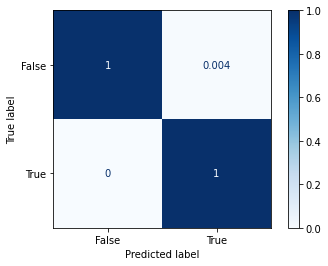

In [0]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(haz_model2, X_test, y_test, normalize = 'true', cmap = plt.cm.Blues)
plt.show()